# Welcome to the MLB Playoff Win Predictor
Let\'s see what is the most impactful single factor to a team in winning games in the postseason of Baseball

## Abstract
I will viewing at a number of telling statistics and trying to find one that has a strong correlation to playoff wins. While fully explaining the importance of these single statistics for the team and how they might contribute to a team's success in the playoffs.

# Research Question
Which Baseball Statistics (RBI, Walks, OPS, ERA, etc.) positively and negatively correlate with Winning Games in the Playoffs for the years 2020-2024? Which statistic correlates the best and worst over that whole time period? Can a prediction algortihm predict how many wins a team will get by looking at a single baseball statistic?

# Hypothesis
I think that in the modern era of Baseball, Offense is on such a rise with new offensive records being broken every year. Being able to quelch a team's offense through pitching would be my assumption of how to win games in the playoffs. It is also well understood that a bullpen (Relief Pitchers) play a very important factor on the success of a team. Therefore, my hypothesis is that a Team's Relief Pitcher's ERA will have the largest positive correlation to winning in the playoffs.

# Background and Prior Knowledge

Baseball has a regular season of 162 games in which the best 12 teams get the oppurtnity to play in the postseason. In recent years, with playoff expansion, more and more head scratching upsets are occurring in the playoffs. For example in the most recent postseason, we saw the 6th ranked team, New York Mets, beat the 2nd ranked team, Philideplphia Phillies. Not only was this the second upset that the Mets made in the postseason, also beating the 3rd ranked Milwalkee Brewers, but there were 2 other upsets on the other side of the bracket. If you go back further to 2019 the Nationals weren't even supposed to make it to the playoffs after three months into the season, they ended up winning the World Series being ranked as the 7th seed. These rankings have always been done by the amount of wins a team has, clearly they aren't the best statistic to rank these teams.

In 1994, there was the broadening of the postseason format with the addition of the Wild Card. Up until 2011 there was only 1 Wild Card Team per league, and then in 2012 they added a Wild Card Series making the format the best 12 teams (6 teams per league, 3 best of divisions and 3 wild cards). The greatest upset with this new format was in 2023, when both teams Texas Rangers and Arizona Diamondbacks, wild cards, made it to the World Series. This postseason had a total of 7 teams win while their opponent was that were ranked higher than them. These "Underdog" stories are always fun to watch as a fan every once in a while, but more recently they appear to be happening more and more often. In the last 5 years there has been a total of 12 Series Wins by Wild Card Teams, not including the Wild Card Series. Due to the uncertainty of these games, more and more people have been tuned in every October to watch the playoffs. Therefore this format probably will not change, and might expand to more teams allowing more of the "Underdog" runs to occur.

The problem comes with trying to predict how games will turn out. Baseball is such a fun sport for Data Scientists as there are over a 100 statistics that tell you how a certain player, or team might perform. These statistics ranging from how often a player/team gets a hit, to how many wins does a individual player contribute above a replacement player. Thankfully the access to all these statistics are publically available and free to use for Data Scientists alike, making many people to create prediction algorithms to try to guess who might win a given game.

In an article titled "Baseball so hard to predict" by Ryan Steig written back in 2019 where it is stated "Preseason playoff predictions rarely turn out to be entirely correct and Major League Baseball is proving that right now" (Steig, 2019). The year 2019 being one of the greatest examples of a "juiced ball" that we have seen in recent year, proves that it is harder to predict the outcome of these games in the playoffs. Even more interesting, the winner of the 2019 World Series was also a Wild Card team, the Washington Nationals. Steig mentions how great these teams were that were entering the postseason that year and the concludes the article by stating "Preseason predictions rarely pan out exactly as expected and the playoffs are the same way" (Steig, 2019). Many people see baseball as very a difficult game to sports bet on due to its volitility. In the article title "5 Reasons Why Betting on Baseball Is So Hard" by John Simons, he views at all the factors that make baseball a hard sport to bet on. The reasons given by Simons are Statistical Complexity, Underdog Wins, Frequent Games, [Betting] Line Movement, and other variables (Simons, 2024). Including these reasons he also highlights how a team "like the LA Dodgers have amazing seasons with records like 111-51, they still lose 30% of the time" (Simons, 2024). Baseball being such a unpredictable sport is why so many people watch it every year.

Even with all the statistics in baseball in mind it is near impossible to predict winners of certain games let alone multiple playoff series due to all the important factors that affect every baseball game. Although this is a difficult task I want to be able to anaylze each statistic individually, checking its correlation with winning in the playoffs. There doesn't seem to be any studies done that cover this specific topic, using this method.

Impelli, M. (2019, October 31). The Washington Nationals defied all odds to win the 2019 World Series. Newsweek. https://www.newsweek.com/washington-nationals-had-ridiculously-small-chance-winning-world-series-1468949 <br>
Simons, J. (2024, July 8). 5 reasons why betting on baseball is so hard. Bet M. https://betm.co/why-betting-on-baseball-is-so-hard/ <br>
Steig, R. (2019, September 27). Baseball so hard to predict. miningjournal.net. https://www.miningjournal.net/sports/sports-columns/2019/09/baseball-so-hard-to-predict/ 

# Datasets Breakdown
I use a total of 3 different Websites to gather these datasets, as these websites had the specific statistics that I wanted. All of these statistics are publically available and were posted on the internet for anyone to see. They also only about a team's analytics nothing player specific.

## Dataset 1 Baseball Reference Datasets
This dataset information was gathered from a website called Baseball Reference which according to its main website page it states "The complete source for current and historical baseball players, teams, scores and leaders". I personally have used this website loads of times to find information on players and its always accurate. Since we want Team analytics we have to use this https://www.baseball-reference.com/leagues/majors/2024.shtml. This link only points to 2024 statistics so I had to go to previous years to gather information about the 4 other years that I wanted to analyze.

The csv files that relate to this website are any csv file in the Data folder that starts with "Batting" or "Fielding", and the specific statistics that I wanted to view from these files are:
##### Batting__.csv <br>
`BatAge`<br>
    Definition: Average of all the player's ages on the team <br> 
    Relevance: Commonly understood that the older a team is the better they will play in a high leverage situations, therefore the older a team is the better they should perform in the playoffs, resulting in more wins<br>
`R/G`<br>
    Definition: At amount of Runs, times that a player crosses the home plate, that a team gets every game <br> 
    Relevance: Seeing that Runs determine who wins a specific game, the teams that scores a lot of runs every game would probably win a lot of games in the playoffs as well <br>
`HR`<br>
    Definition: When a player hits a ball over the fence and scores everyone who was on base <br> 
    Relevance: This is probably the most effective way of scoring runs and since that determines who wins a game, a team with more homeruns would probably win more games in the postseason <br>
`OPS`<br>
    Definition: OPS or Onbase Plus Slugging represents the rate that a player gets on base plus the amount that they hit weighted for how many bases they touch on the hit, (0 - no hit, 1 - single, 2 - double, 3 - triple, 4 - homerun) <br> 
    Relevance: This is a common stat used to evaluate a player's hitting ability against other players, if a whole team's OPS is better than another teams than they would likely hit better, score more runs, and win more games, therefore contributing to winning in the playoffs <br>
`R`<br>
    Definition: The amount of times that a runner crosses home plate, credited to the runner <br> 
    Relevance: Runs are used to determine the winner of a given ballgame, therefore the more runs a team score the more it might score to win in the playoffs <br>
`H`<br>
    Definition: A Hit is a non-error contact with the baseball where the player ends up on base, this counts for all types of contact with the bat not including errors or fielder's choice, a time that a player chooses to get another runner out instead of the person that made contact with the ball <br> 
    Relevance: The more hits a team has the more runs they score, therefore more wins in the postseaon <br>
`2B`<br>
    Definition: Double is when a player hits a ball and reaches second base <br> 
    Relevance: Great hit for rallies as it clears the bases while keeping someone in 'Scoring Position', on Second or Third Base<br>
`3B`<br>
    Definition: Triple is when a player hits a ball and reaches third base <br> 
    Relevance: Even better for rallies as clears the bases and places a player only 1 base away from homeplate<br>
`RBI`<br>
    Definition: When a non-error hit results in a player crosses homeplate, credited to the hitter <br> 
    Relevance: This shows the amount of effective hits that result in runs by hitters on a team resulting in more winning <br>
`SB`<br>
    Definition: When a runner moves from one base to another, without the aid of a hit <br> 
    Relevance: This helps move players in bases closer to homeplate making it easier to score runs and win games <br>
`CS`<br>
    Definition: The amount of time that runner is caught, gets out, while attempting to steal a base <br> 
    Relevance: Being caught from stealing a base happens a lot in baseball and many times this statistic really shows how aggresive a team. For example the leader in all time stolen bases, Rickey Henderson, is also the leader in all time caught stolen. The more aggresive a team the better they might play in a highly competitive enviroment <br>
`BB`<br>
    Definition: Walk is being pitched 4 balls, pitches outside of the strike zone, from the pitcher <br> 
    Relevance: This shows the patience of a team and how good of an eye for the strike zone that it's players might have. With this patience and calmness the players would probably play better in high pressure positions <br>
`SO`<br>
    Definition: Striking out is getting pitched 3 pitches that end up in the strike zone <br> 
    Relevance: In recent years players that strikeout the most also happen to hit a large amount of homeruns, therefore a this concept should stay true when you apply for an entire team, which would helps these teams win more games <br>
`BA`<br>
    Definition: Batting Average is the amount of hits that a team gets divided by the amount of at-bats (the amount of time an plate appearence did not end in a fielders choice, error, or a batter is out to a non-sacrifice) they have <br> 
    Relevance: This is one of the most famous statistics used all the time in baseball to see how often a team would gets a hit when they go up to the plate. The more hits a team gets should correlate to more runs and overall wins <br>
`OBP`<br>
    Definition: On Base Percentage is the amount of time a player reaches base safely from overall plate appearances <br> 
    Relevance: In recent years this has shown the be a better metric to show the effectiveness of a hitter, their job is to get on base, and it doesn't have to be by a hit; it could be by a walk or possibly hit-by-pitch, which are not factored in for Batting Average <br>
`SLG`<br>
    Definition: Slugging Percentage is a average of a scoring system taking the amount of total bases a team gets and dividing this by the amount of at-bats they have <br> 
    Relevance: Since this is almost a weighted version of Batting Average, as it counts the amount of bases you received from your hits this really shows how many total bases a team gets and how often they get these bases, therefore should result in more wins <br>
`OPS+`<br>
    Definition: The plus stands for a standardized version of a statistic, in this case a league average is 100 and every other teams Onbase Plus Slugging is standardized according to the league average <br> 
    Relevance: A helpful statistic to standarized Onbase Plus Slugging throughout year and to see how good a team is doing compared to everyone in the league, this shouldn't be much different compared to a current year's OPS but since we are including different years in this expierment using this statistic is helpful in viewing how good a team hit compared to other teams in that league <br>
`TB`<br>
    Definition: The Total Bases a team gets, 1 base being a single, 2 bases being a double, etc. <br> 
    Relevance: The more bases a team gets the more likely they are to score runs, therefore they would win more games <br>
`GDP`<br>
    Definition: This is the amount of time that a team grouds out into a double play <br> 
    Relevance: This should have a negative correlation as more teams that get outs should win less, especially in the playoffs, and I want to check and make sure my correlations make sense <br>
`HBP`<br>
    Definition: Hit by pitch is the amount of times a player is hit by a ball and rewarded first base <br> 
    Relevance: This is rare, almost random, action that barely would effect a team playing well therefore I expect a no correlation with this statistic <br>
`SH`<br>
    Definition: Sacrifice Hit is when a player will hit a ball get an out and advance the runner to another base <br> 
    Relevance: This will push these players closer to home plate making more runs happen and more likely to win games <br>
`SF`<br>
    Definition: Sacrifice Fly is when a player will hit into the air and get an out to advance the runner to another base <br> 
    Relevance: This will also push more players closer to home plate making more runs happen and more likely to win games <br>
`IBB`<br>
    Definition: Intential Walks occur when a pitcher give first base to a batter instead of pitching to that batter <br> 
    Relevance: This usually happens due to pitchers being afraid the hitter will score runs, and the pitchers are doing this on purpose therefore the teams with more intentional walks will probably have more players that will score runs on them <br>
`LOB`<br>
    Definition: Left On Base is a statistic that explains how many runners were left on base and did not score <br> 
    Relevance: Although this is somewhat of a random statistic, it would have a correlation with players getting on base therefore it might have a slight positive correlation with winning games <br>
##### Fielding__.csv <br>
`Rtot`<br>
    Meaning: Total Zone describes how a many defensive contribution expressed in the estimated amount of runs that they helped above the average team <br> 
    Relevance: This is one of the best statistics that is used to evaluate and compare teams defensive capabilities, a common understanding in sports is that a team with a good defense will beat a team with the same level of offense <br>
`Rdrs`<br>
    Meaning: Defensive Runs Saved shows the amounts of runs that were saved compared to the average team <br> 
    Relevance: Another statistic that can help compare defensive capabilities, and for the same reason as Total Zone it would be interesting to see this statisitic correlation with playoff wins <br>

## Dataset 2 MLB Datasets
There are two main types of pitchers, starters and relief pitchers. Generally starting pitchers start the game pitch for about 5 or 6 innings (about half the games) and then a relief pitcher(s) will come in pitch 1-2 innings. This keeps the starting pitcher healthy and makes the pitches harder to hit if you are switching out the pitcher often. This also allows the relief pitchers to throw harder as they won't be on the field for very long. Due to this main difference, I wanted to seperate the statistics instead of grouping a whole team's pitching statistics. I found website on the main MLB wesbtie, https://www.mlb.com/stats/team/pitching/innings-pitched/2024?split=sp, where I gathered both of these analytics starting and relief pitching for every year of the 5 years that I am analyzing.

##### Starting__.csv <br>
`Starting ERA`<br>
    Meaning: Earned Run Average is the amount earned runs (runs not caused by error) multiplied by the amount of innings there are in a normal game and divided by the amount of innings that the team has pitched <br> 
    Relevance: ERA is one of the most popular statistics to tell how effective a pitcher is at not giving up runs, which should correlate with more winning, especially in the playoffs where these starters will pitch longer into games <br>
`Starting WHIP`<br>
    Meaning: Walk plus Hits over the amount of Innings Pitched is a number that tells you how many players reach base safely every inning <br> 
    Relevance: WHIP is probably a better number, as it has no affect on fielding just the amount of runners you give up per inning which if this is really low we would expect a very good correlation to winning <br>

##### Relief__.csv <br>
`Relief ERA`<br>
    Meaning: Earned Run Average is the amount earned runs (runs not caused by error) multiplied by the amount of innings there are in a normal game and divided by the amount of innings that the team has pitched <br> 
    Relevance: The relief group of pitchers, or 'Bullpen', is a great way to see a team's depth and the better a team's depth the more likely for them to win in the playoffs as you end up utilizing every single player to their absolute limit to win. Therefore a team with a really good Bullpen should also perform well during the postseason <br>
`Relief WHIP`<br>
    Meaning: Walk plus Hits over the amount of Innings Pitched is a number that tells you how many players reach base safely every inning<br> 
    Relevance: For the same reason of depth as ERA, and therefore a bullpen giving up less runners should correlate with more winning <br>

## Dataset 3 Steve The Ump Dataset
In recent year, there is an established narrative that if you spend more money your team will play better. This shown to have a strong correlation but there are also many outliers in recent year with some teams spending the most and not making it to the playoffs, and some teams that spend the very little on salary, in comparison, who end up winning playoff games. I found this website called Steve the Ump, https://www.stevetheump.com/Payrolls.htm, and here which has compiled all the public salaries of the teams throughout the years. 

##### Salaries__.csv <br>
`Team Salary`<br>
    Meaning: How much team spends on its players in a given year <br> 
    Relevance: The more spent on your team should result in more wins in total which means that a team should also perfom better in the postseason <br>



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [61]:
batting20 = pd.read_csv("Data/BaseballStats2020/Batting20.csv")
fielding20 = pd.read_csv("Data/BaseballStats2020/Fielding20.csv")
relief20 = pd.read_csv("Data/BaseballStats2020/Relief20.csv")
salaries20 = pd.read_csv("Data/BaseballStats2020/Salaries20.csv")
starting20 = pd.read_csv("Data/BaseballStats2020/Starting20.csv")

batting21 = pd.read_csv("Data/BaseballStats2021/Batting21.csv")
fielding21 = pd.read_csv("Data/BaseballStats2021/Fielding21.csv")
relief21 = pd.read_csv("Data/BaseballStats2021/Relief21.csv")
salaries21 = pd.read_csv("Data/BaseballStats2021/Salaries21.csv")
starting21 = pd.read_csv("Data/BaseballStats2021/Starting21.csv")

batting22 = pd.read_csv("Data/BaseballStats2022/Batting22.csv")
fielding22 = pd.read_csv("Data/BaseballStats2022/Fielding22.csv")
relief22 = pd.read_csv("Data/BaseballStats2022/Relief22.csv")
salaries22 = pd.read_csv("Data/BaseballStats2022/Salaries22.csv")
starting22 = pd.read_csv("Data/BaseballStats2022/Starting22.csv")

batting23 = pd.read_csv("Data/BaseballStats2023/Batting23.csv")
fielding23 = pd.read_csv("Data/BaseballStats2023/Fielding23.csv")
relief23 = pd.read_csv("Data/BaseballStats2023/Relief23.csv")
salaries23 = pd.read_csv("Data/BaseballStats2023/Salaries23.csv")
starting23 = pd.read_csv("Data/BaseballStats2023/Starting23.csv")

batting24 = pd.read_csv("Data/BaseballStats2024/Batting24.csv")
fielding24 = pd.read_csv("Data/BaseballStats2024/Fielding24.csv")
relief24 = pd.read_csv("Data/BaseballStats2024/Relief24.csv")
salaries24 = pd.read_csv("Data/BaseballStats2024/Salaries24.csv")
starting24 = pd.read_csv("Data/BaseballStats2024/Starting24.csv")

In [62]:
batting20 = batting20.rename(columns = {'Tm':'Team'})
fielding20 = fielding20.rename(columns = {'Tm':'Team'})
relief20 = relief20.rename(columns = {'TEAM':'Team'})
starting20 = starting20.rename(columns = {'TEAM':'Team'})
salaries20 = salaries20.rename(columns = {'TEAM':'Team'})

batting21 = batting21.rename(columns = {'Tm':'Team'})
fielding21 = fielding21.rename(columns = {'Tm':'Team'})
relief21 = relief21.rename(columns = {'TEAM':'Team'})
starting21 = starting21.rename(columns = {'TEAM':'Team'})
salaries21 = salaries21.rename(columns = {'TEAM':'Team'})

batting22 = batting22.rename(columns = {'Tm':'Team'})
fielding22 = fielding22.rename(columns = {'Tm':'Team'})
relief22 = relief22.rename(columns = {'TEAM':'Team'})
starting22 = starting22.rename(columns = {'TEAM':'Team'})
salaries22 = salaries22.rename(columns = {'TEAM':'Team'})

batting23 = batting23.rename(columns = {'Tm':'Team'})
fielding23 = fielding23.rename(columns = {'Tm':'Team'})
relief23 = relief23.rename(columns = {'TEAM':'Team'})
starting23 = starting23.rename(columns = {'TEAM':'Team'})
salaries23 = salaries23.rename(columns = {'TEAM':'Team'})

batting24 = batting24.rename(columns = {'Tm':'Team'})
fielding24 = fielding24.rename(columns = {'Tm':'Team'})
relief24 = relief24.rename(columns = {'TEAM':'Team'})
starting24 = starting24.rename(columns = {'TEAM':'Team'})
salaries24 = salaries24.rename(columns = {'TEAM':'Team'})

team_name_mapping = {
    # American League (AL)
    "Yankees": "New York Yankees",
    "Red Sox": "Boston Red Sox",
    "Blue Jays": "Toronto Blue Jays",
    "Rays": "Tampa Bay Rays",
    "Orioles": "Baltimore Orioles",
    "White Sox": "Chicago White Sox",
    "Guardians": "Cleveland Guardians",
    "Tigers": "Detroit Tigers",
    "Royals": "Kansas City Royals",
    "Twins": "Minnesota Twins",
    "Astros": "Houston Astros",
    "Angels": "Los Angeles Angels",
    "Athletics": "Oakland Athletics",
    "Mariners": "Seattle Mariners",
    "Rangers": "Texas Rangers",
    # National League (NL)
    "Braves": "Atlanta Braves",
    "Marlins": "Miami Marlins",
    "Mets": "New York Mets",
    "Phillies": "Philadelphia Phillies",
    "Nationals": "Washington Nationals",
    "Cubs": "Chicago Cubs",
    "Reds": "Cincinnati Reds",
    "Brewers": "Milwaukee Brewers",
    "Pirates": "Pittsburgh Pirates",
    "Cardinals": "St. Louis Cardinals",
    "Diamondbacks": "Arizona Diamondbacks",
    "Rockies": "Colorado Rockies",
    "Dodgers": "Los Angeles Dodgers",
    "Padres": "San Diego Padres",
    "Giants": "San Francisco Giants"
}

def standarize_teams(team):
    return team[team.index('\n')+1:]
def standarize_money(money):
    return int(money[1:].replace(',', ""))
def mergetopia(dfs):
    totalmerge = dfs[0]
    for i in range(1, len(dfs)):
        totalmerge = pd.merge(totalmerge, dfs[i])
    return totalmerge

fielding20 = fielding20[['Team', 'Rtot', 'Rdrs']]
batting20 = batting20[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting20 = starting20[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief20 = relief20[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries20 = salaries20[['Team', 'Total Payroll']].set_index('Team').rename(columns = {'Total Payroll' : 'Team Salary'}, index = team_name_mapping ).reset_index()
relief20['Team'] = relief20['Team'].apply(standarize_teams)
starting20['Team'] = starting20['Team'].apply(standarize_teams)
salaries20["Team Salary"] = salaries20["Team Salary"].apply(standarize_money)
Team_Data20 = mergetopia([fielding20, batting20, starting20, relief20, salaries20])

fielding21 = fielding21[['Team', 'Rtot', 'Rdrs' ]]
batting21 = batting21[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting21 = starting21[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief21 = relief21[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries21 = salaries21[['Team', 'Total']].set_index('Team').rename(columns = {'Total' : 'Team Salary'}, index = team_name_mapping ).reset_index()
relief21['Team'] = relief21['Team'].apply(standarize_teams)
starting21['Team'] = starting21['Team'].apply(standarize_teams)
salaries21["Team Salary"] = salaries21["Team Salary"].apply(standarize_money)
Team_Data21 = mergetopia([fielding21, batting21, starting21, relief21, salaries21])

fielding22 = fielding22[['Team', 'Rtot', 'Rdrs' ]]
batting22 = batting22[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting22 = starting22[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief22 = relief22[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries22 = salaries22[['Team', 'Total']].set_index('Team').rename(columns = {'Total' : 'Team Salary'}, index = team_name_mapping ).reset_index()
relief22['Team'] = relief22['Team'].apply(standarize_teams)
starting22['Team'] = starting22['Team'].apply(standarize_teams)
salaries22["Team Salary"] = salaries22["Team Salary"].apply(standarize_money)
Team_Data22 = mergetopia([fielding22, batting22, starting22, relief22, salaries22])

fielding23 = fielding23[['Team', 'Rtot', 'Rdrs' ]]
batting23 = batting23[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting23 = starting23[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief23 = relief23[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries23 = salaries23[['Team', 'Total Payroll']].set_index('Team').rename(columns = {'Total Payroll' : 'Team Salary'}, index = team_name_mapping ).reset_index()
relief23['Team'] = relief23['Team'].apply(standarize_teams)
starting23['Team'] = starting23['Team'].apply(standarize_teams)
salaries23["Team Salary"] = salaries23["Team Salary"].apply(standarize_money)
Team_Data23 = mergetopia([fielding23, batting23, starting23, relief23, salaries23])

fielding24 = fielding24[['Team', 'Rtot', 'Rdrs' ]]
batting24 = batting24[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting24 = starting24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief24 = relief24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries24 = salaries24[['Team', 'TOTAL PAYROLL']].set_index('Team').rename(columns = {'TOTAL PAYROLL' : 'Team Salary'}, index = team_name_mapping ).reset_index()
relief24['Team'] = relief24['Team'].apply(standarize_teams)
starting24['Team'] = starting24['Team'].apply(standarize_teams)
salaries24["Team Salary"] = salaries24["Team Salary"].apply(standarize_money)
Team_Data24 = mergetopia([fielding24, batting24, starting24, relief24, salaries24])

All_data = [Team_Data20, Team_Data21, Team_Data22, Team_Data23, Team_Data24]
for i in range(len(All_data)):
    print("202" + str(i) + " Season")
    display(All_data[i].set_index('Team').head())



2020 Season


,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,3,0,29.1,4.48,58,0.704,269,482,101,12,...,36,1,23,5,402,1.40,5.04,1.46,4.60,64201669
Atlanta Braves,-6,-7,28.2,5.80,103,0.832,348,556,130,3,...,23,1,7,13,446,1.45,5.51,1.28,3.50,66275488
Baltimore Orioles,22,1,26.3,4.57,77,0.750,274,523,102,7,...,27,15,10,5,410,1.35,5.09,1.27,3.90,23918577
Boston Red Sox,-25,0,27.0,4.87,81,0.775,292,552,118,7,...,21,4,9,8,429,1.56,5.34,1.64,5.79,84478422
Chicago Cubs,32,28,27.9,4.42,74,0.705,265,422,82,8,...,52,1,13,9,412,1.15,3.77,1.34,4.38,76166963


2021 Season


,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-20,-37,28.9,4.19,144,0.692,679,1297,308,31,...,54,32,28,24,1152,1.38,5.20,1.52,5.08,89077233
Atlanta Braves,60,50,28.2,4.91,239,0.754,790,1307,269,20,...,67,32,43,36,1072,1.19,3.84,1.32,3.97,134459435
Baltimore Orioles,-47,-30,26.7,4.07,195,0.705,659,1296,266,15,...,65,14,31,12,1046,1.51,5.99,1.46,5.70,45701135
Boston Red Sox,-65,4,28.0,5.12,219,0.777,829,1434,330,23,...,61,10,42,22,1093,1.37,4.49,1.39,3.99,180261996
Chicago Cubs,-21,29,29.1,4.35,210,0.719,705,1255,225,26,...,92,40,30,17,1019,1.46,5.27,1.34,4.39,149665500


2022 Season


,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,29,55,26.5,4.33,173,0.689,702,1232,262,24,...,60,31,50,14,1039,1.23,4.05,1.39,4.58,75993333
Atlanta Braves,18,31,27.5,4.87,243,0.761,789,1394,298,11,...,66,1,36,13,1030,1.22,3.72,1.14,3.03,173935000
Baltimore Orioles,6,38,27.0,4.16,171,0.695,674,1281,275,25,...,83,12,43,10,1095,1.33,4.35,1.24,3.49,30221166
Boston Red Sox,3,-2,28.8,4.54,155,0.731,735,1427,352,12,...,63,12,50,23,1133,1.35,4.49,1.36,4.59,195166000
Chicago Cubs,3,2,27.9,4.06,159,0.698,657,1293,265,31,...,84,19,36,16,1100,1.30,3.95,1.31,4.12,130560000


2023 Season


,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,43,46,27.4,4.60,166,0.730,746,1359,274,44,...,58,36,50,11,1091,1.34,4.67,1.30,4.22,112763571
Atlanta Braves,21,16,27.9,5.85,307,0.845,947,1543,293,23,...,67,2,43,20,1062,1.34,4.36,1.25,3.81,199727500
Baltimore Orioles,37,34,27.2,4.98,183,0.742,807,1399,309,28,...,45,21,47,14,1041,1.23,4.14,1.26,3.55,64907966
Boston Red Sox,-17,-20,28.6,4.77,182,0.748,772,1437,339,19,...,71,11,35,15,1117,1.29,4.68,1.39,4.32,175783182
Chicago Cubs,9,36,28.4,5.06,196,0.751,819,1399,269,30,...,77,15,52,11,1127,1.28,4.26,1.29,3.85,180115000


2024 Season


,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-11,13,28.6,5.47,211,0.777,886,1452,271,37,...,84,34,66,17,1111,1.34,4.79,1.37,4.41,156511716
Atlanta Braves,10,35,29.3,4.35,213,0.724,704,1333,273,15,...,58,9,39,11,1088,1.20,3.58,1.18,3.32,225315000
Baltimore Orioles,-21,1,26.9,4.85,235,0.751,786,1391,262,33,...,64,6,45,14,1108,1.24,3.77,1.23,4.22,94495168
Boston Red Sox,28,49,27.3,4.64,194,0.741,751,1404,311,30,...,73,7,40,30,1116,1.19,3.81,1.34,4.39,162324847
Chicago Cubs,12,37,27.8,4.54,170,0.710,736,1318,253,29,...,70,17,41,19,1105,1.22,3.77,1.29,3.81,216330000


Now we have completeley merged the 5 csv files that I gathers earlier into one Clean Dataset with all the teams in 2024 and their team statistics that I see as valuable variables that could contribute to a team winning more playoff wins. Now we have to merge a columns of playoffs wins that each of these teams had and see how these statistics measure up.

In [63]:
baseball_terms = {'Rtot':'Total Zone','Rdrs':'Defensive Runs Saved','BatAge':'Average Age of Batters','R/G':'Runs per Game','HR':'Home Runs','OPS':'On-base Plus Slugging','R':'Runs','H':'Hits','2B':'Doubles','3B':'Triples','RBI':'Runs Batted In','SB':'Stolen Bases','CS':'Caught Stealing','BB':'Walks','SO':'Strikeouts','BA':'Batting Average','OBP':'On-base Percentage','SLG':'Slugging Percentage','OPS+':'Adjusted On-base Plus Slugging','TB':'Total Bases','GDP':'Ground into Double Plays','HBP':'Hit by Pitch','SH':'Bunts','SF':'Sacrifice Flies','IBB':'Intentional Base on Balls','LOB':'Left on Base'}
playoff_wins = {
    20: pd.DataFrame({'Team':["Tampa Bay Rays","Oakland Athletics","Minnesota Twins","Cleveland Indians","New York Yankees","Houston Astros","Chicago White Sox","Toronto Blue Jays","Los Angeles Dodgers","Atlanta Braves","Chicago Cubs","San Diego Padres","St. Louis Cardinals","Miami Marlins","Cincinnati Reds","Milwaukee Brewers"],"Playoff Wins":[11,3,0,0,4,8,1,0,13,8,0,2,1,2,0,0]}),
    21: pd.DataFrame({'Team':["Tampa Bay Rays","Houston Astros","Chicago White Sox","Boston Red Sox","New York Yankees","San Francisco Giants","Milwaukee Brewers","Atlanta Braves","Los Angeles Dodgers","St. Louis Cardinals"],"Playoff Wins":[1,9,1,6,0,2,1,11,6,0]}),
    22: pd.DataFrame({'Team':["Houston Astros","New York Yankees","Cleveland Guardians","Toronto Blue Jays","Seattle Mariners","Tampa Bay Rays","Los Angeles Dodgers","Atlanta Braves","St. Louis Cardinals","New York Mets","San Diego Padres","Philadelphia Phillies"],"Playoff Wins":[11,3,4,0,2,0,1,1,0,1,5,11]}),
    23: pd.DataFrame({'Team':["Toronto Blue Jays","Minnesota Twins","Houston Astros","Texas Rangers","Tampa Bay Rays","Baltimore Orioles","Arizona Diamondbacks","Miami Marlins","Philadelphia Phillies","Milwaukee Brewers","Los Angeles Dodgers","Atlanta Braves"],"Playoff Wins":[0,3,6,13,0,0,10,0,8,0,0,1]}),
    24: pd.DataFrame({'Team':["Detroit Tigers","Houston Astros","Kansas City Royals","Baltimore Orioles","Cleveland Guardians","New York Yankees","New York Mets","Philadelphia Phillies","Milwaukee Brewers","San Diego Padres","Atlanta Braves","Los Angeles Dodgers"],"Playoff Wins":[4,0,2,0,3,8,7,1,1,4,0,11]})
}
team_data = {20:Team_Data20, 21:Team_Data21, 22:Team_Data22, 23:Team_Data23, 24:Team_Data24}
def get_strength(correl):
    if correl >= 0.8: return 'Very Strong Positive'
    elif correl >= 0.6: return 'Fairly Strong Positive'
    elif correl >= 0.4: return 'Moderate Positive'
    elif correl >= 0.2: return 'Weak Positive'
    elif correl >= 0: return 'Very Weak Positive'
    elif correl >= -0.2: return 'Very Weak Negative'
    elif correl >= -0.4: return 'Weak Negative'
    elif correl >= -0.6: return 'Moderate Negative'
    elif correl >= -0.8: return 'Fairly Strong Negative'
    else: return 'Very Strong Negative'
All_correlations = []
for year in range(20,25):
    postseason_data = pd.merge(playoff_wins[year], team_data[year]).rename(columns=baseball_terms)
    cols = postseason_data.columns
    corrvals = []
    stats = []
    strengths = []
    
    for i in range(2, len(cols)):
        correl = postseason_data['Playoff Wins'].corr(postseason_data[cols[i]])
        corrvals.append(correl)
        stats.append(cols[i])
        strengths.append(get_strength(correl))
    
    correlations = pd.DataFrame({"Statistic":stats,"Correlations":corrvals,"Strength":strengths})
    correlations = correlations.sort_values(by='Correlations',ascending=False)
    All_correlations.append(correlations)
    print(f"20{year} Season")
    display(correlations.set_index('Statistic').head())

2020 Season


,Correlations,Strength
Statistic,,
Runs per Game,0.620995,Fairly Strong Positive
Runs,0.616994,Fairly Strong Positive
Runs Batted In,0.595020,Moderate Positive
Doubles,0.554669,Moderate Positive
On-base Plus Slugging,0.545283,Moderate Positive


2021 Season


,Correlations,Strength
Statistic,,
Slugging Percentage,0.655702,Fairly Strong Positive
Total Bases,0.625327,Fairly Strong Positive
Sacrifice Flies,0.618964,Fairly Strong Positive
On-base Plus Slugging,0.608351,Fairly Strong Positive
Runs Batted In,0.597024,Moderate Positive


2022 Season


,Correlations,Strength
Statistic,,
Relief WHIP,0.368609,Weak Positive
Sacrifice Flies,0.225648,Weak Positive
Relief ERA,0.138391,Very Weak Positive
Ground into Double Plays,0.129613,Very Weak Positive
Stolen Bases,0.129503,Very Weak Positive


2023 Season


,Correlations,Strength
Statistic,,
Relief ERA,0.572539,Moderate Positive
Bunts,0.395555,Weak Positive
Relief WHIP,0.391620,Weak Positive
Triples,0.379410,Weak Positive
Starting WHIP,0.372454,Weak Positive


2024 Season


,Correlations,Strength
Statistic,,
Walks,0.581575,Moderate Positive
Runs Batted In,0.548038,Moderate Positive
Runs,0.533087,Moderate Positive
Runs per Game,0.528850,Moderate Positive
On-base Percentage,0.473192,Moderate Positive


## Graphs for the 3 Strongest and Weakest Correlation Statistics 2020-2024

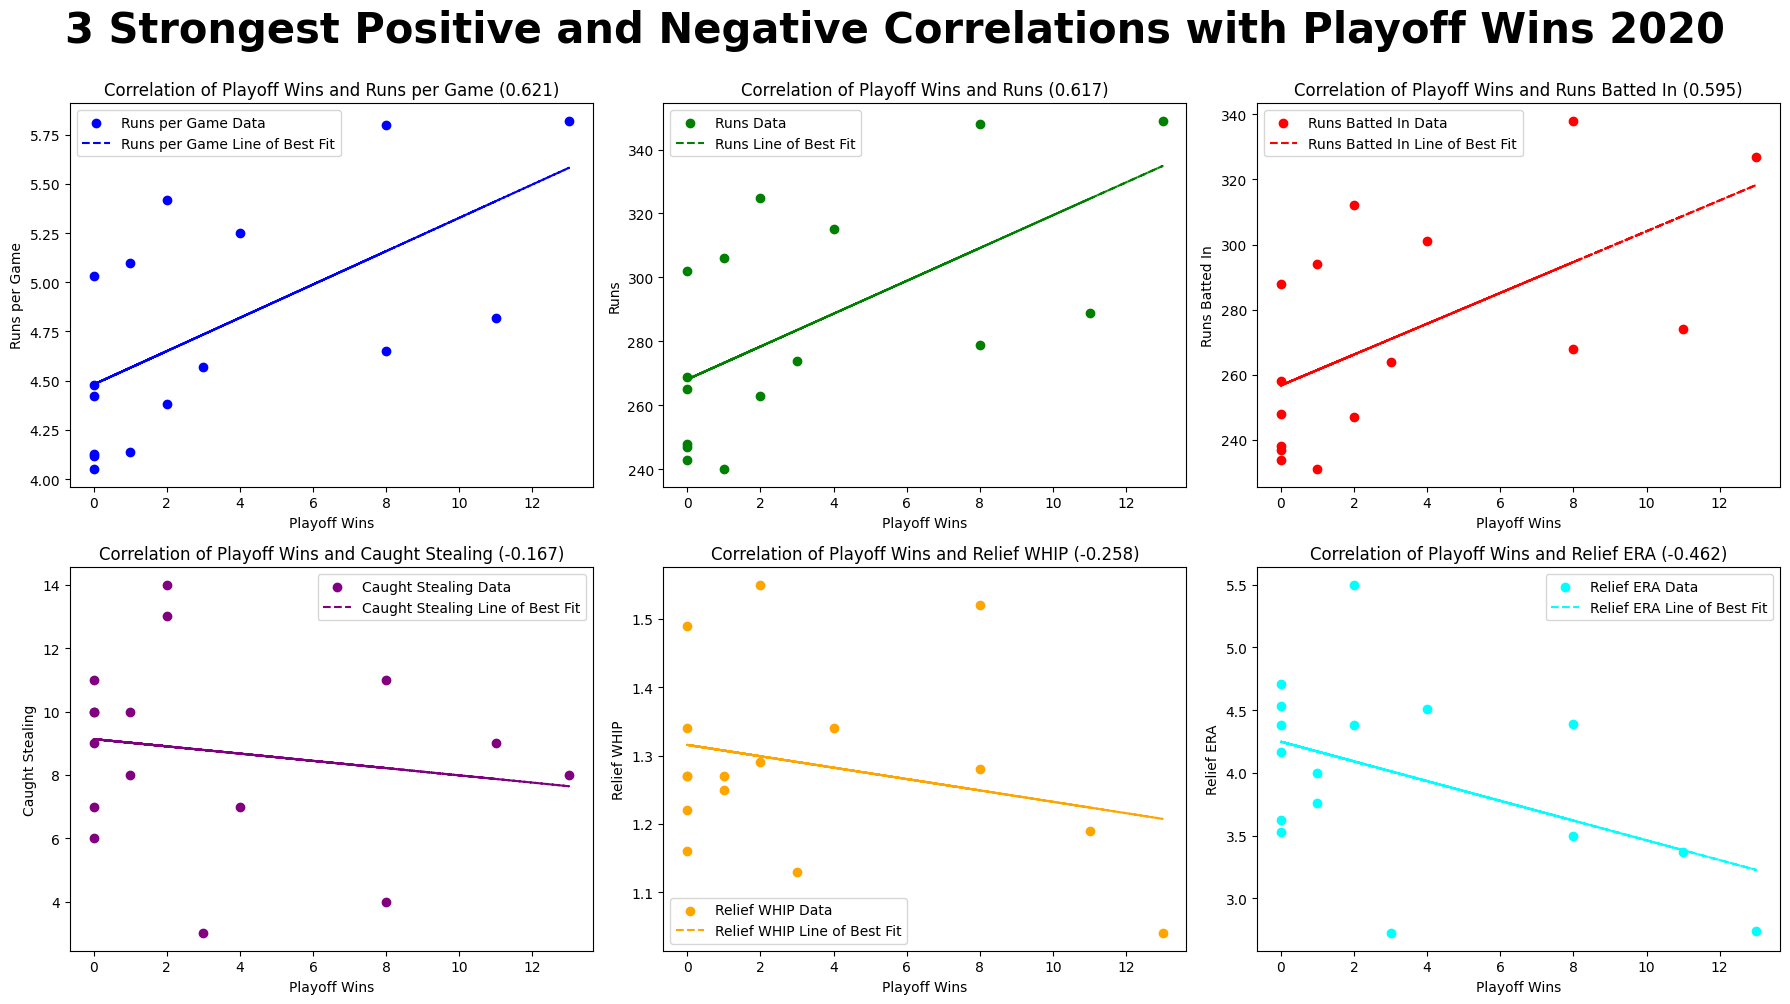

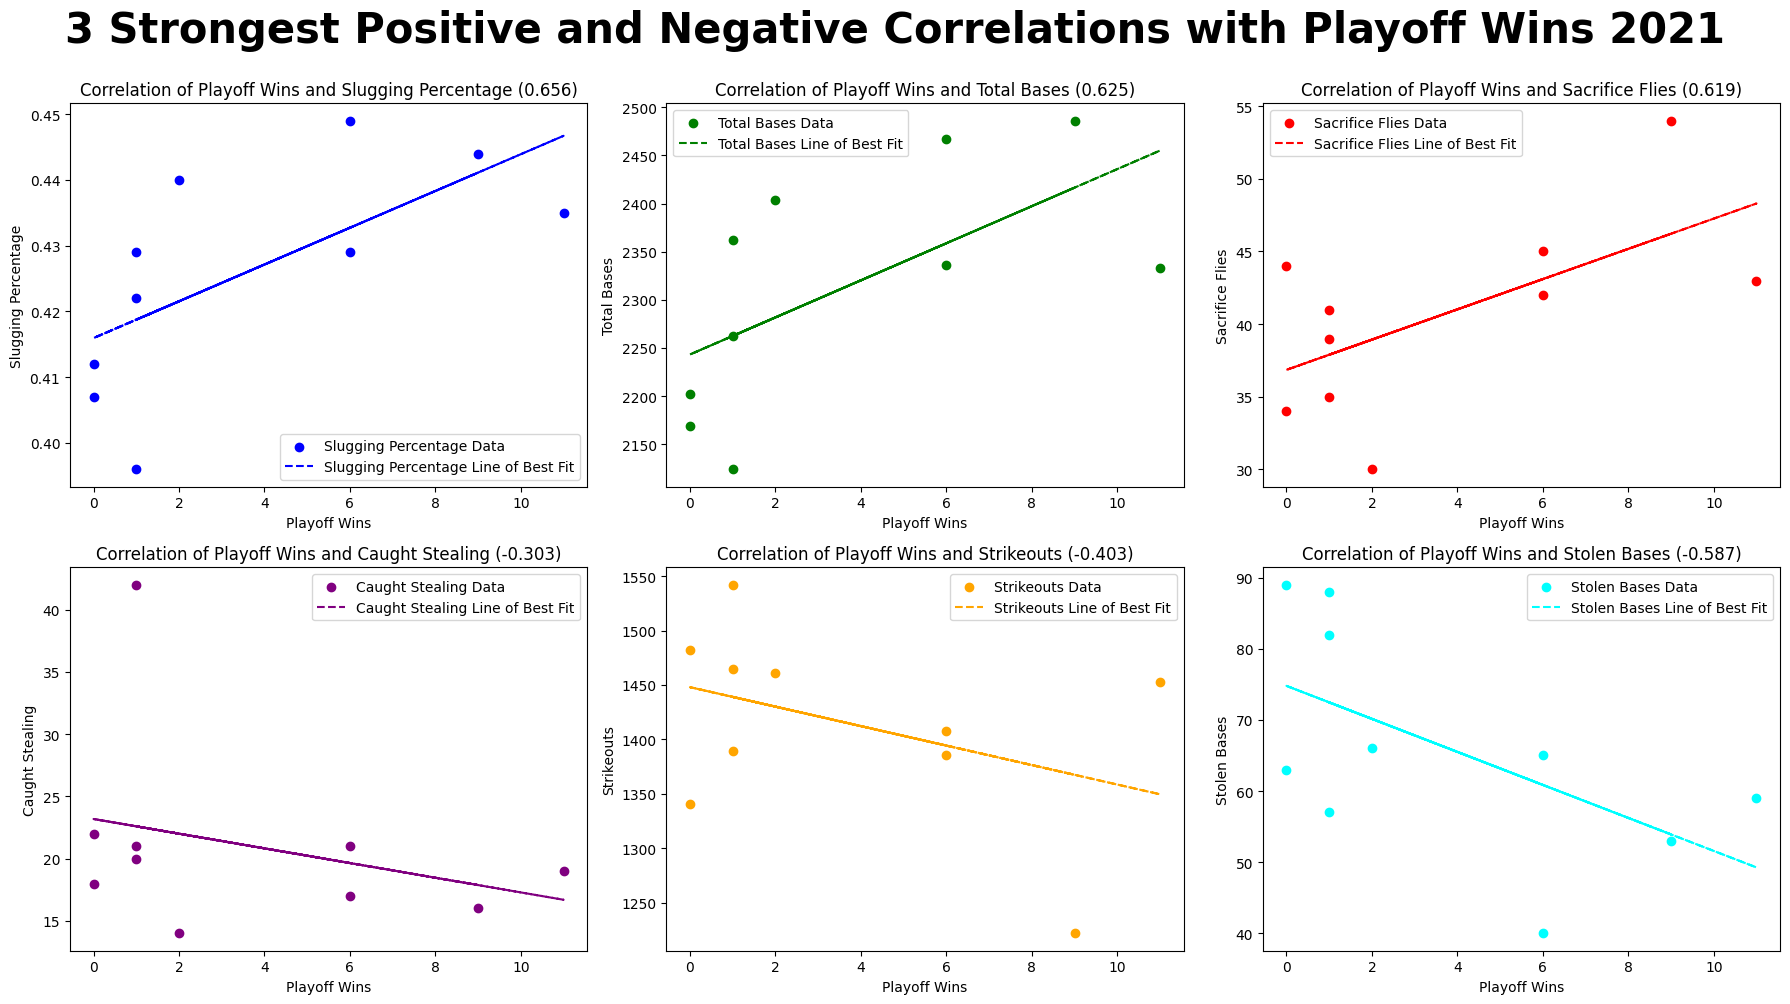

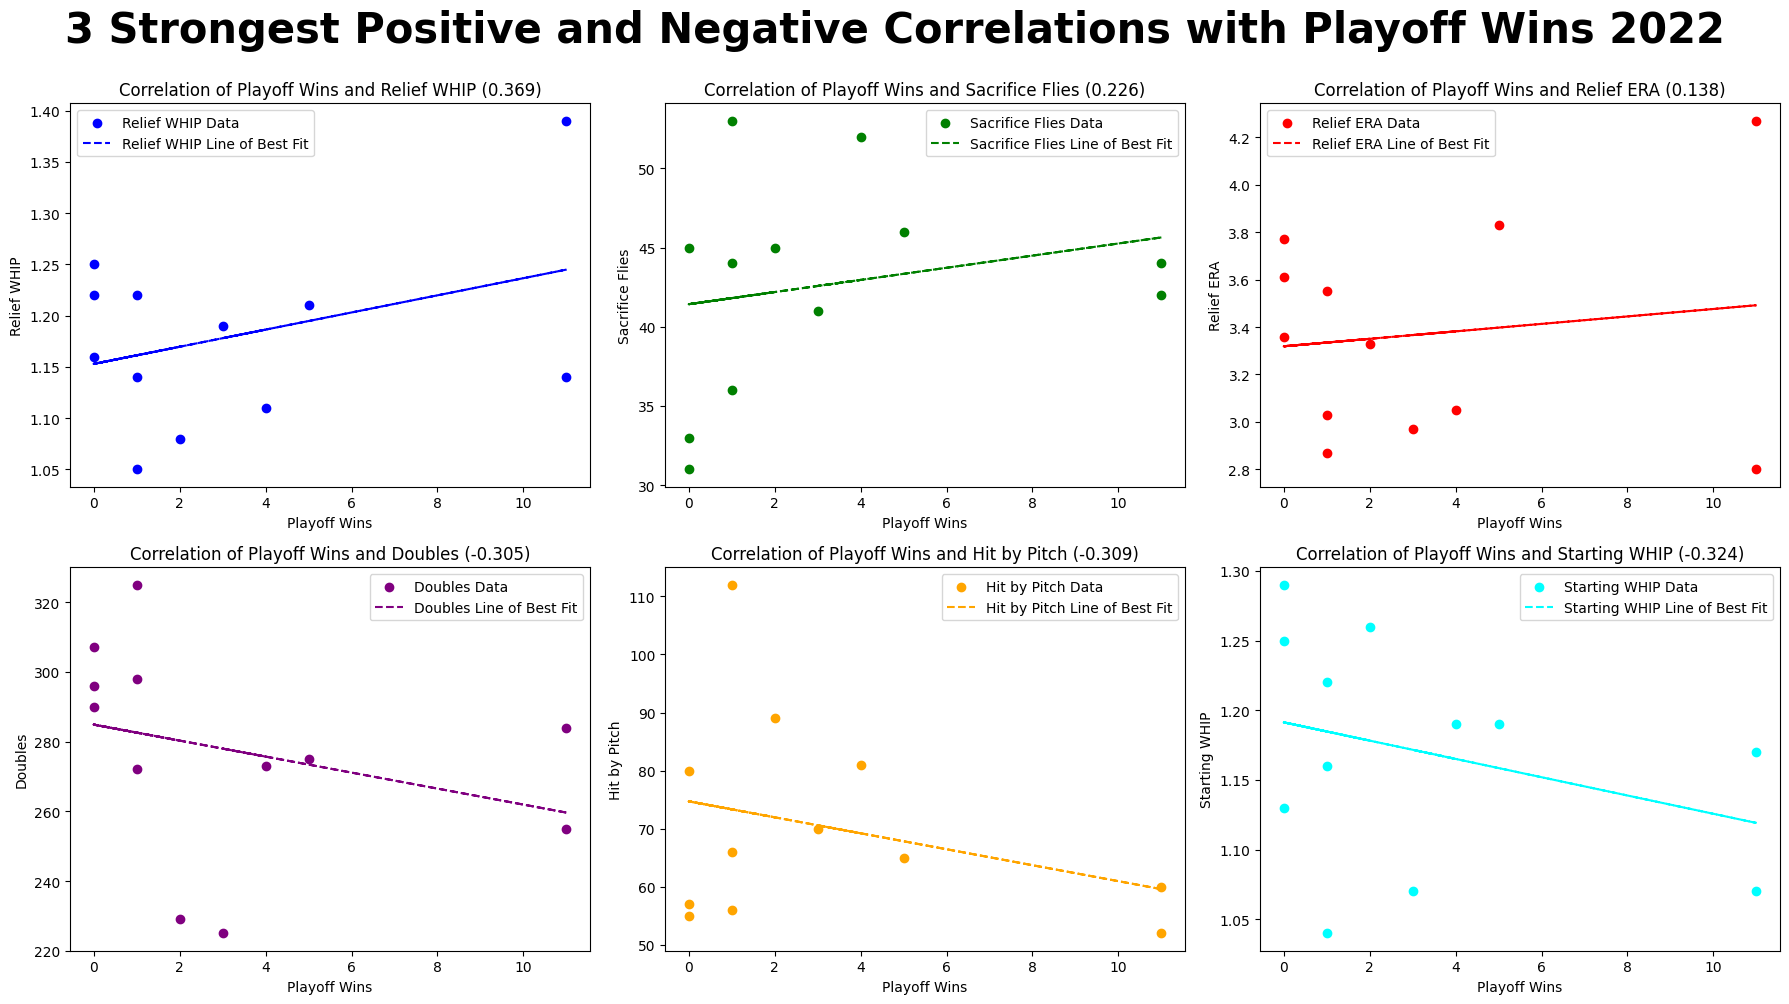

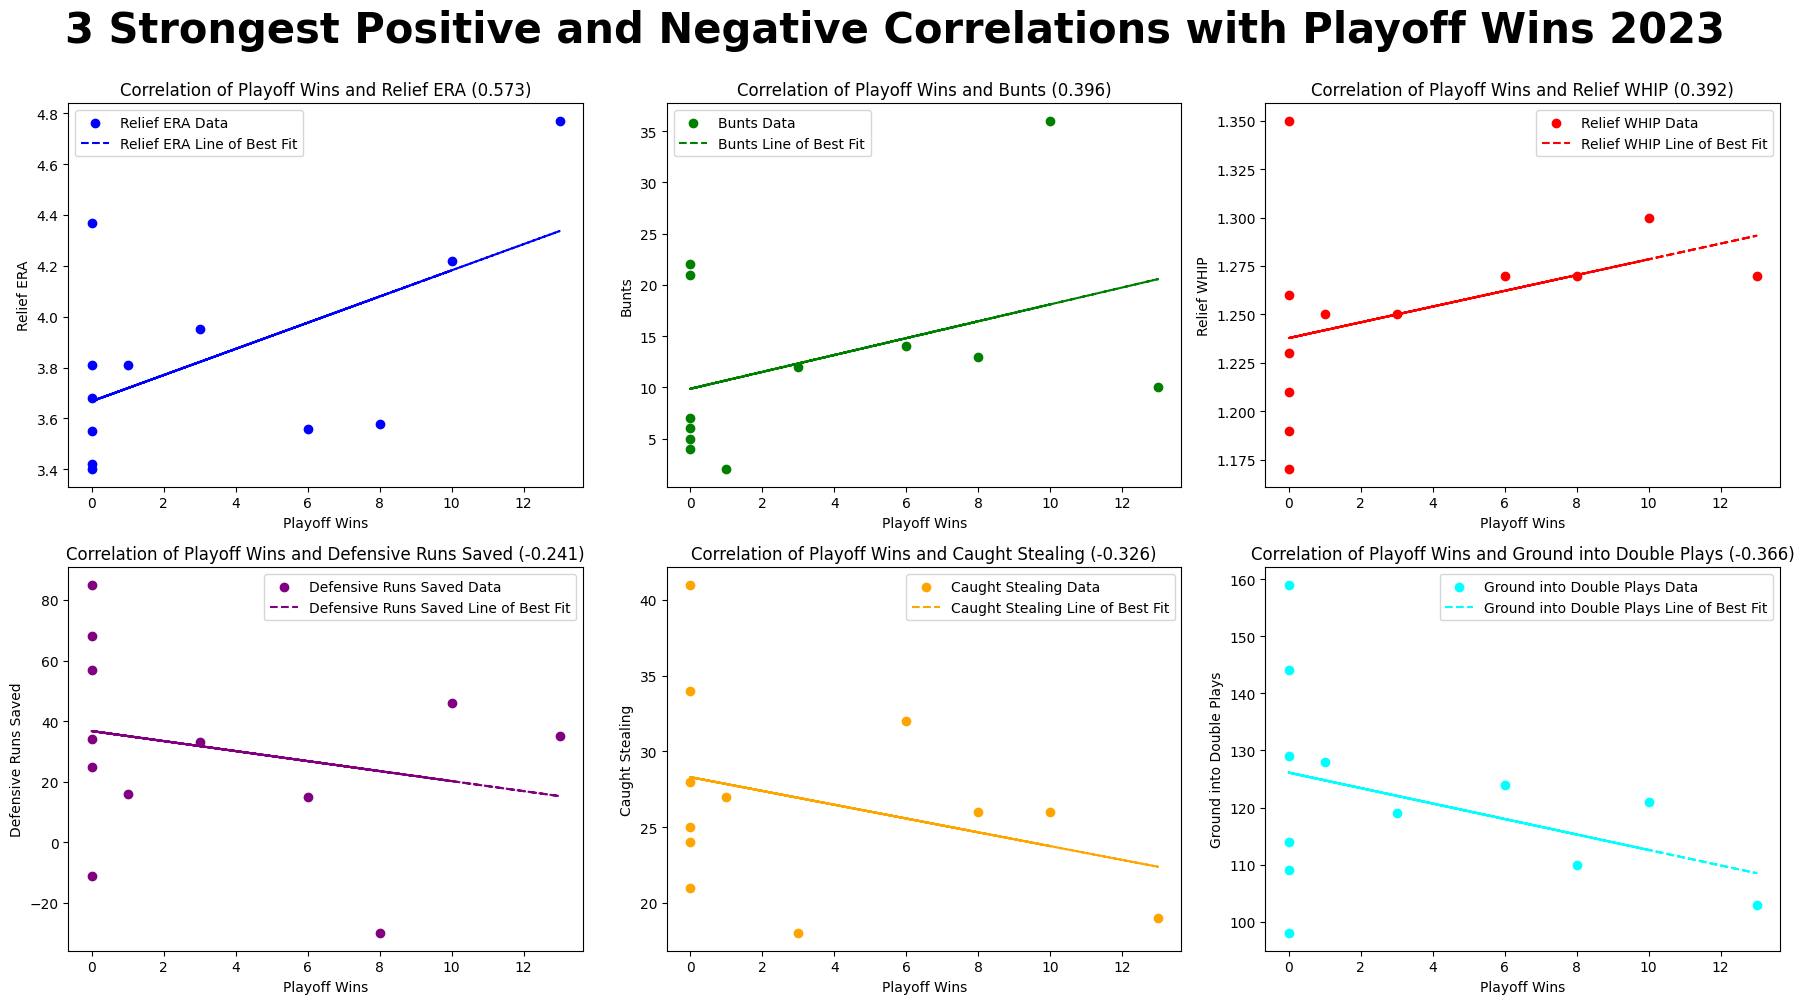

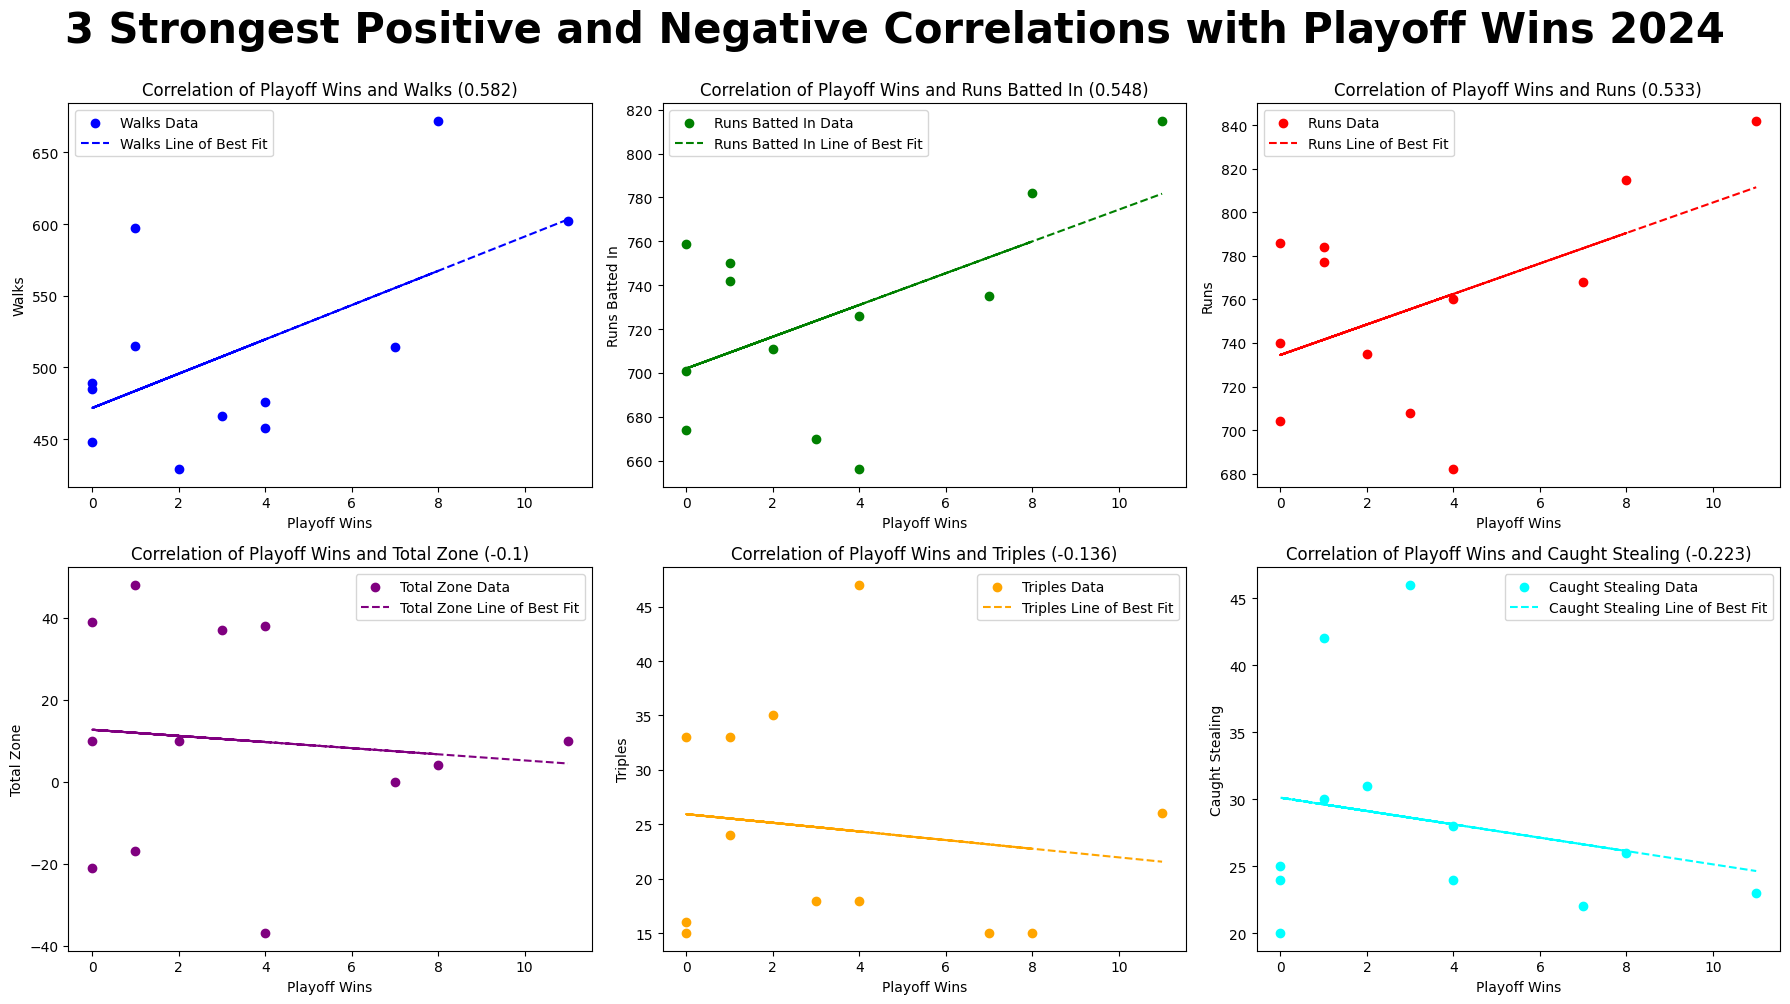

In [64]:
important_dfs = []
for year in range(20, 25):
    corr_var = globals()[f'Correlations{year}']
    important_df = pd.concat([corr_var.iloc[:3], corr_var.iloc[-3:]]).set_index('Statistic')
    important_dfs.append(important_df)

postseason_data = [globals()[f'postseason_data{year}'] for year in range(20, 25)]
importants = list(zip(important_dfs, postseason_data))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for year, (c, p) in enumerate(importants):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    fig.suptitle(f'3 Strongest Positive and Negative Correlations with Playoff Wins 202{year}', fontsize=30, fontweight='bold', y=1)
    for i, (index, row) in enumerate(c.iterrows()):
        a, b = np.polyfit(p['Playoff Wins'], p[index], 1)
        axes[i].scatter(p['Playoff Wins'], p[index], color=colors[i], label=f'{index} Data')
        axes[i].plot(p['Playoff Wins'], a * p['Playoff Wins'] + b, color=colors[i], linestyle='--', label=f'{index} Line of Best Fit')
        axes[i].set_xlabel('Playoff Wins')
        axes[i].set_ylabel(index)
        axes[i].set_title(f"Correlation of Playoff Wins and {index} ({round(row['Correlations'], 3)})")
        axes[i].legend()
    plt.tight_layout()
    plt.show()

These Table below show the accumlative correlation score over the five years. Showing the Runs Batted In, Runs per Game, and Slugging Percentage having the strongest positive correlation with winning in the playoffs. The strongest negative correlations being Strikeouts, Hit by Pitch, and Caught Stealing, which are expected to have a negative effect on winning.

In [65]:
accumlative_correlations = All_correlations[0].sort_values(by='Statistic')
for df in All_correlations[1:]:
    df = df.sort_values(by='Statistic')
    accumlative_correlations['Correlations'] += df['Correlations'].values

correl20_24 = pd.concat([
    accumlative_correlations
    .drop(columns='Strength')
    .set_index('Statistic')
    .sort_values('Correlations', ascending=False)
    .iloc[:3],
    accumlative_correlations
    .drop(columns='Strength')
    .set_index('Statistic')
    .sort_values('Correlations', ascending=False)
    .iloc[-3:]])
correl20_24

,Correlations
Statistic,
Runs Batted In,1.690984
Runs per Game,1.624074
Slugging Percentage,1.617575
Strikeouts,-0.691509
Hit by Pitch,-0.712218
Caught Stealing,-1.296321


## EDA Visualization
Here are some graphs to show how these statistic's change from year to year. If we see sharp changes between the five years of these correlations it should show if the statistic is randomly correlated to wins, due to our small sample size.

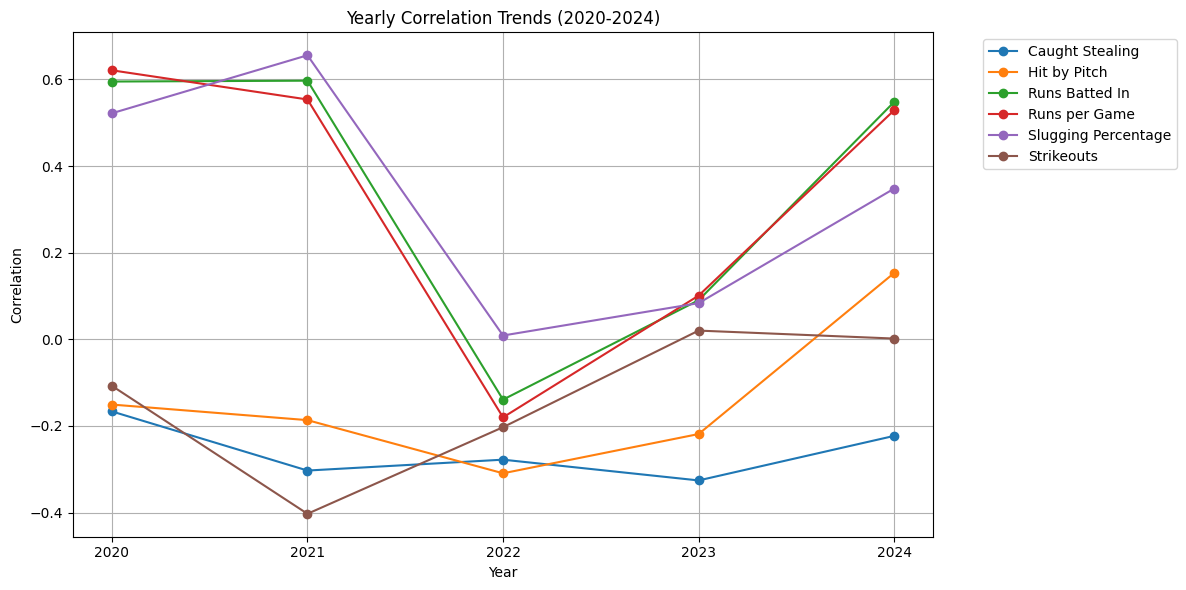

In [66]:
year_to_year = list(correl20_24.index)
all_years = [[], [], [], [], []]
years = [2020, 2021, 2022, 2023, 2024] 
for i in range(len(All_correlations)):
    for e in year_to_year:
        all_years[i].append(All_correlations[i].set_index('Statistic').loc[e]['Correlations'])
changes = pd.DataFrame({})

data = pd.DataFrame({
    'Year': years * len(year_to_year),
    'Statistic': [stat for stat in year_to_year for _ in years],
    'Correlation': [corr for stat_corrs in list(zip(*all_years)) for corr in stat_corrs]
})
pivot_df = data.pivot(index='Year', columns='Statistic', values='Correlation')
plt.figure(figsize=(12, 6))
for stat in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[stat], marker='o', label=stat)
plt.xticks(years)
plt.title('Yearly Correlation Trends (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

These trends show the volitility of looking at statistics, on such a small sample size of games in the playoffs. I think that many of these trends though have general winning and losing correlations throughout the 5 year span. For example, you can see how the amount of Caught Stealing a given teams has will most assuredley negatively correlate with them losing games in the playoffs. Another example would be Slugging Percentage, with the exception of 2022, this is a very strongly correlated statistic with winning in the postseason. Logically both of these correlations make sense, Caught Stealing being something that results in an out and a loss of the runner in scoring postion, while on the other hand Slugging Percentage is a valuable statistic to see the performance of an offense. Although these correlations from year to year change a lot, over a much larger sample size of playoff games this randomness would peter out and you would expect to see much stronger correlations with these statistics.

## Predictor
*Explanation of how the predictor works*

In [75]:
all_postseason = [postseason_data20, postseason_data21, postseason_data22, postseason_data23, postseason_data24]

features_list = []
target_list = []

for data in all_postseason:
    features = data[['Runs Batted In', 'Runs per Game', 'Slugging Percentage']] 
    target = data['Playoff Wins']
    features_list.append(features)
    target_list.append(target)

X = pd.concat(features_list)
y = pd.concat(target_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 17.24
R-squared: -0.34
Coefficients: [ 0.57565003  1.92365469 -0.59137144]
Intercept: 3.3469387755102034
